# 成為資料分析師 | Python 資料分析

>  資料分析套件快速入門

郭耀仁 <yaojenkuo@datainpoint.com> from [DATAINPOINT](https://datainpoint.substack.com/welcome)

## 大綱

- 資料分析與管線流
- NumPy 快速入門
- Pandas 快速入門
- Matplotlib 快速入門

## 資料分析與管線流

## 資料分析的一切都與管線流息息相關

![Imgur](https://i.imgur.com/din6Ig6.png)

圖片來源: <https://r4ds.had.co.nz/>

## 每個環節的意涵

- Import：從常見來源將資料載入分析環境
- Tidy/Transform：以適當的資料結構整併內容與轉換樣式
- Visualize：探索分析資料的形狀、相關、組成與趨勢
- Model：預測或挖掘資料的隱含特徵
- Communicate：向產品、行銷與管理團隊精準且有效地傳達分析洞察
- Program：利用程式語言掌握管線流

## 每個環節都有對應套件支援

- [NumPy](https://numpy.org/) 可以支援 Import、Tidy/Transform 與 Model
- [Pandas](https://pandas.pydata.org/) 可以支援 Import、Tidy/Transform 與 Visualise
- [Matplotlib](https://matplotlib.org/) 可以支援 Visualise、Model 與 Communicate

## 確認分析環境能夠使用這三個套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl

## 檢視這些第三方套件的版本資訊

In [2]:
print(np.__version__)
print(pd.__version__)
print(mpl.__version__)

1.18.4
1.0.3
3.2.1


## NumPy 快速入門

## 簡介 NumPy 套件

> NumPy，Numerical Python 的簡稱，是使用 Python 進行科學計算的第三方套件，創造了一個稱為 N 維陣列（ndarray）的類別，透過 N 維陣列，可以將 Python 從一個泛用（general purposed）程式語言轉變成一個科學計算（scientific computing）程式語言，並且有豐富的統計、線性代數與隨機的函式。

## 範例資料：COVID-19 每日報告

資料來源：<https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports>

In [3]:
import datetime

def get_latest_daily_report():
    """
    This function returns the latest global daily report from https://github.com/CSSEGISandData/COVID-19 and its file date.
    """
    latest_date = datetime.date.today()
    day_delta = datetime.timedelta(days=1)
    fmt = '%m-%d-%Y'
    while True:
        try:
            latest_date_fmt = latest_date.strftime(fmt)
            csv_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv".format(latest_date_fmt)
            daily_report = pd.read_csv(csv_url)
            print("載入了 {} 的每日報告。".format(latest_date_fmt))
            break
        except:
            latest_date_fmt = latest_date.strftime(fmt)
            print("尚未有 {} 的每日報告。".format(latest_date_fmt))
            latest_date -= day_delta
    return latest_date, daily_report

In [4]:
latest_date, daily_report = get_latest_daily_report()

尚未有 09-13-2020 的每日報告。
載入了 09-12-2020 的每日報告。


## N 維陣列可由資料框取出

In [5]:
confirmed = daily_report['Confirmed'].values
type(confirmed)

numpy.ndarray

## N 維陣列提供兩個好用的功能

- 向量化（Vectorization）運算、有時也稱為元素級別（Element-wise）運算
- 布林索引（Boolean indexing）

## 向量化運算

In [6]:
deaths = daily_report['Deaths'].values
recovered = daily_report['Recovered'].values
active = confirmed - deaths - recovered # Vectorization

## 布林索引

In [7]:
print(confirmed.size)
print(confirmed > 100000)                 # Creating a boolean array
print(confirmed[confirmed > 100000].size) # Boolean indexing

3954
[False False False ... False False False]
65


## 試著使用內建資料結構 `list` 完成前兩個任務（藉此體驗 N 維陣列的便利性）

1. 計算治療中個案數；
2. 挑選確診數超過 10 萬的觀測值。

In [8]:
# 計算治療中個案數
confirmed = list(daily_report['Confirmed'].values)
deaths = list(daily_report['Deaths'].values)
recovered = list(daily_report['Recovered'].values)

In [9]:
# 挑選確診數超過 10 萬的觀測值
confirmed = list(daily_report['Confirmed'].values)

## 除了 N 維陣列，NumPy 還附帶豐富的函式

- 通用函式
- 聚合函式
- 隨機函式
- 線性代數函式
- ...etc.

## 暸解更多 NumPy 提供的功能

[NumPy User Guide](https://www.numpy.org/devdocs/user/index.html)

## Pandas 快速入門

## 簡介 Pandas 套件

> Pandas，Panel DataFrame Series 的簡稱，是在 Python 中分析表格資料的第三方套件，創造了稱為索引（Index）、序列（Series）與資料框（DataFrame）的類別，透過這些類別，可以讓 Python 在面對文字檔案、Excel 試算表與關聯式資料庫時能夠使用更直覺的觀念操作。

## 將 CSV 文字檔案讀入成為資料框

- 範例資料：COVID-19 每日報告
- 資料來源：<https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports>

In [10]:
latest_date, daily_report = get_latest_daily_report()
type(daily_report)

尚未有 09-13-2020 的每日報告。
載入了 09-12-2020 的每日報告。


pandas.core.frame.DataFrame

## Pandas 提供三種新的資料結構

- `DataFrame`
- `Series`
- `Index`

In [11]:
print(type(daily_report))              # DataFrame
print(type(daily_report['Confirmed'])) # Series
print(type(daily_report.columns))      # Index
print(type(daily_report.index))        # Index

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


## 使用更直覺的觀念操作資料

- 如何定義「更直覺」？
    - Spreadsheet-like；
    - SQL-like

## 基礎的資料框操作

- 衍生（mutate），新增欄位到資料框中，特別是新欄位與既有欄位具有函式的輸出以及輸入關係；
- 選擇（select），從資料框中依據名稱挑出單個或多個欄位；
- 篩選（filter），依據判斷條件（布林值）從資料框中挑出符合（布林值為 True）的觀測值；
- 摘要（summarise），對欄位進行聚合（Aggregate）的運算將多筆觀測值總結；
- 排序（arrange），對觀測值由小到大（遞增）或者由大到小（遞減）變動排列順序；
- 分組（group by），將欄位依照獨一類別進行摘要。

## 衍生（mutate）

治療中案例數可以用既有的欄位計算而得，常見的定義為：確診數減去死亡數再減痊癒數。

\begin{equation}
\text{Active} = \text{Confirmed} - \text{Deaths} - \text{Recovered}
\end{equation}

In [12]:
active = daily_report["Confirmed"] - daily_report["Deaths"] - daily_report["Recovered"]
active

0        5987
1        4361
2       12527
3         348
4        1914
        ...  
3949     9717
3950        1
3951      216
3952     1147
3953     1609
Length: 3954, dtype: int64

## 選擇（select）

在中括號裡頭輸入欄位名稱可以將資料以 `Series` 外型從資料框中取出。

In [13]:
daily_report["Country_Region"]

0              Afghanistan
1                  Albania
2                  Algeria
3                  Andorra
4                   Angola
               ...        
3949    West Bank and Gaza
3950        Western Sahara
3951                 Yemen
3952                Zambia
3953              Zimbabwe
Name: Country_Region, Length: 3954, dtype: object

## 選擇（select）

若想要選擇多個欄位，將多個欄位名稱以 `list` 傳入中括號。

In [14]:
multiple_columns = ["Country_Region", "Confirmed", "Deaths", "Recovered"]
daily_report[multiple_columns]

,Country_Region,Confirmed,Deaths,Recovered
0,Afghanistan,38641,1420,31234
1,Albania,11185,330,6494
2,Algeria,48007,1605,33875
3,Andorra,1344,53,943
4,Angola,3335,132,1289
...,...,...,...,...
3949,West Bank and Gaza,29906,210,19979
3950,Western Sahara,10,1,8
3951,Yemen,2009,582,1211
3952,Zambia,13466,312,12007


## 篩選（filter）

在中括號裡頭輸入判斷條件所獲得的布林值 `Series` 可以獲得指定的觀測值。

In [15]:
is_tw = daily_report['Country_Region'] == 'Taiwan*' # 台灣在哪裡
is_tw

0       False
1       False
2       False
3       False
4       False
        ...  
3949    False
3950    False
3951    False
3952    False
3953    False
Name: Country_Region, Length: 3954, dtype: bool

In [16]:
daily_report[is_tw] # is_tw 是一個布林值 Series

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
622,NaN,NaN,NaN,Taiwan*,2020-09-13 04:30:52,23.7,121.0,498,7,475,16.0,Taiwan*,2.090963,1.405622


## 摘要（summarize）

對 `Series` 呼叫聚合方法，例如加總 `.sum()`。

In [17]:
daily_report['Confirmed'].sum()

28759036

## 分組（group by）與摘要（summarise）

以國家為分組層級，所以在 `groupby()` 方法中傳入 Country_Region 欄位，獲得一個 `DataFrameGroupBy` 類別。

In [18]:
daily_report.groupby("Country_Region")

## 分組（group by）與摘要（summarise） 

指定 `DataFrameGroupBy` 類別的欄位與聚合函式，獲得分組摘要的結果，是一個 `Series`。

In [19]:
daily_report.groupby("Country_Region")['Confirmed'].sum()

Country_Region
Afghanistan           38641
Albania               11185
Algeria               48007
Andorra                1344
Angola                 3335
                      ...  
West Bank and Gaza    29906
Western Sahara           10
Yemen                  2009
Zambia                13466
Zimbabwe               7508
Name: Confirmed, Length: 188, dtype: int64

## 排序（arrange）

呼叫 `Series` 的 `sort_values(ascending=False)` 方法將摘要結果由大到小遞減排序。

In [20]:
confirmed_by_country = daily_report.groupby("Country_Region")['Confirmed'].sum()
confirmed_by_country.sort_values(ascending=False)[:10] # 顯示確診人數前 10 高的國家

Country_Region
US              6485214
India           4754356
Brazil          4315687
Russia          1053663
Peru             716670
Colombia         708964
Mexico           663973
South Africa     648214
Spain            566326
Argentina        546481
Name: Confirmed, dtype: int64

## 除了基礎操作，Pandas 還能夠進行

- 網頁表格內容載入
- 關聯式資料庫操作
- 視覺化
- ...etc.

## 暸解更多 Pandas 提供的功能

[pandas: powerful Python data analysis toolkit](http://pandas.pydata.org/pandas-docs/stable/)

## Matplotlib 快速入門

## 簡介 Matplotlib 套件

> Matplotlib，Matlab Plotting Library 的簡稱，是在 Python 中將資料視覺化的第三方套件。

## pyplot 模組

> 隸屬於 Matplotlib 的繪圖工具，用類似 Matlab 的語法建立視覺化。

In [21]:
import matplotlib.pyplot as plt

## 使用流程

- 將資料整理為 `ndarray` 或 `Series` 格式
- 呼叫 `plt.figure()` 展開「畫布物件」、呼叫 `plt.axes()` 展開「軸物件」
- 依照探索需求呼叫「軸物件」的作圖方法
- 依照設計需求添加「軸物件」的元素
- 呼叫 `plt.show()` 顯示圖形（或者 `plt.savefig()` 儲存圖形）

## 將 CSV 文字檔案讀入成為資料框

- 範例資料：COVID-19 時間序列
- 資料來源：<https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series>

In [22]:
request_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
time_series = pd.read_csv(request_url)
type(time_series)

pandas.core.frame.DataFrame

In [23]:
time_series.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


## 資料整理：轉置

In [24]:
id_cols = time_series.columns[:4]
time_series_long = pd.melt(time_series, id_vars=id_cols, var_name='Date', value_name='Confirmed')
time_series_long.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


## 資料整理：轉換 `Date` 型別

In [25]:
date = pd.to_datetime(time_series_long['Date'])
time_series_long = time_series_long.drop('Date', axis=1)
time_series_long.insert(4, 'Date', date)
time_series_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62510 entries, 0 to 62509
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  19035 non-null  object        
 1   Country/Region  62510 non-null  object        
 2   Lat             62510 non-null  float64       
 3   Long            62510 non-null  float64       
 4   Date            62510 non-null  datetime64[ns]
 5   Confirmed       62510 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.9+ MB


## 繪製兩個視覺化

1. 台灣累計確診人數趨勢圖；
2. 台灣每日新增確診人數長條圖。

## 繪製台灣累計確診人數趨勢圖

## 將資料整理為 `ndarray` 或 `Series` 格式

In [26]:
tw = time_series_long[time_series_long['Country/Region'] == 'Taiwan*']
x = tw['Date'].values
y = tw['Confirmed'].values

## 呼叫 `plt.figure()` 展開「畫布物件」、呼叫 `plt.axes()` 展開「軸物件」

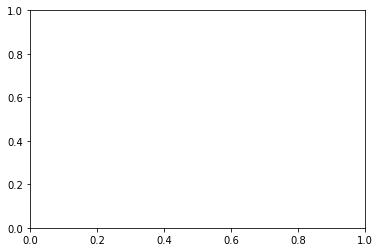

In [27]:
fig = plt.figure()
ax = plt.axes()

## 依照探索需求呼叫「軸物件」的作圖方法

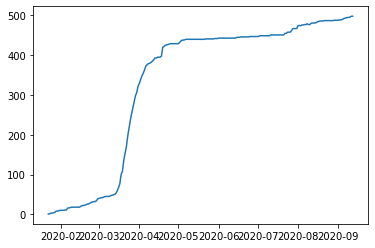

In [28]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)

## 依照設計需求添加「軸物件」的元素

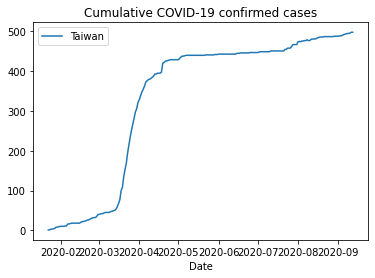

In [29]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y, label="Taiwan")
ax.set_xlabel('Date')
ax.set_title('Cumulative COVID-19 confirmed cases')
ax.legend(loc='upper left')

## 呼叫 plt.show() 顯示圖形

或者 `plt.savefig()` 儲存圖形。

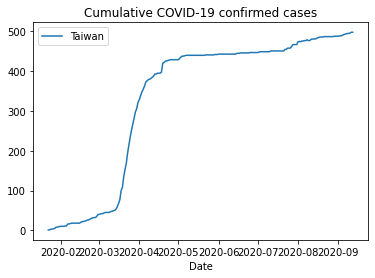

In [30]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y, label="Taiwan")
ax.set_xlabel('Date')
ax.set_title('Cumulative COVID-19 confirmed cases')
ax.legend(loc='upper left')
plt.show() # plt.savefig('tw_covid19_time_series.png')

## 繪製台灣每日新增確診人數長條圖

## 將資料整理為 `ndarray` 或 `Series` 格式

In [31]:
daily_increase = np.diff(tw['Confirmed'].values, n=1)

## 呼叫 `plt.figure()` 展開「畫布物件」、呼叫 `plt.axes()` 展開「軸物件」

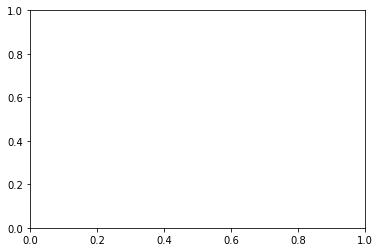

In [32]:
fig = plt.figure()
ax = plt.axes()

## 依照探索需求呼叫「軸物件」的作圖方法

<BarContainer object of 234 artists>

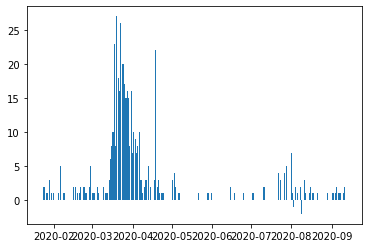

In [33]:
fig = plt.figure()
ax = plt.axes()
ax.bar(x[1:], daily_increase)

## 依照設計需求添加「軸物件」的元素

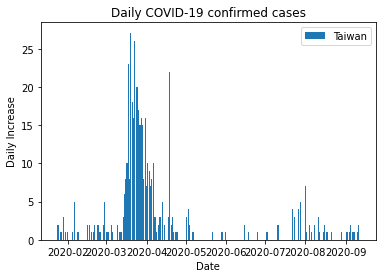

In [34]:
fig = plt.figure()
ax = plt.axes()
ax.bar(x[1:], daily_increase, label='Taiwan')
ax.set_title('Daily COVID-19 confirmed cases')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Increase')
ax.set_ylim(0, None)
ax.legend(loc='upper right')

## 呼叫 plt.show() 顯示圖形

或者 `plt.savefig()` 儲存圖形。

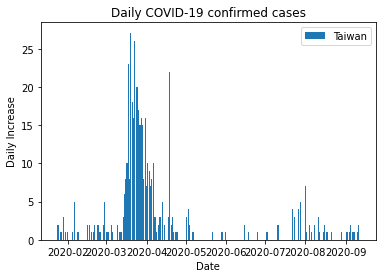

In [35]:
fig = plt.figure()
ax = plt.axes()
ax.bar(x[1:], daily_increase, label='Taiwan')
ax.set_title('Daily COVID-19 confirmed cases')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Increase')
ax.set_ylim(0, None)
ax.legend(loc='upper right')
plt.show() # plt.savefig('tw_covid19_daily_increase.png')